In [115]:
%config IPCompleter.greedy=True
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn

In [116]:
city_CSV = os.path.join('city_data.csv')
ride_CSV = os.path.join('ride_data.csv')

city_df = pd.read_csv(city_CSV)

ride_df = pd.read_csv(ride_CSV)

In [117]:
#count the number of rides
total=ride_df['city'].value_counts()

total1=total.to_frame(name=None)

csv_count=total1.reset_index()

csv_count=csv_count.rename(columns={'index':'city','city':'count'})

csv_count.head()

,city,count
0,Swansonbury,34
1,Port Johnstad,34
2,South Louis,32
3,Port James,32
4,Alvarezhaven,31


In [118]:
#Clean Data
ride_df_city_fare = ride_df.drop(columns=['date','ride_id'])
ride_df_city_fare = ride_df_city_fare.groupby(['city'],as_index=False).mean()
ride_df_city_fare.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [119]:
new_df=pd.merge(city_df, csv4, on='city')

new_df=pd.merge(new_df, csv_count, on='city')

new_df.head()

,city,driver_count,type,fare,count
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [120]:
d_count=new_df['driver_count']
d_count.head()

0    63
1     8
2    12
3    34
4    52
Name: driver_count, dtype: int64

Text(32.9163,0.5,'Average Fare in Dollars')

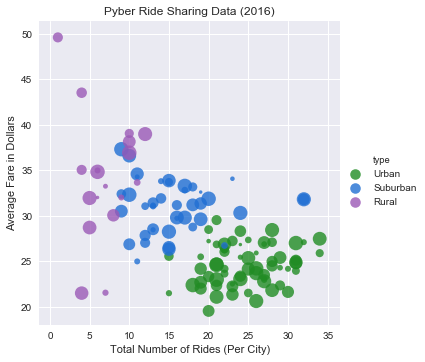

In [121]:
d_count=new_df['driver_count']

seaborn.lmplot(x='count',y='fare',data=new_df, hue='type', palette=dict(Urban='#218c24', Suburban='#206fd3',Rural='#9b59b6'),fit_reg=False, scatter_kws={'s': d_count*3, 'edgecolors':'black'},)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare in Dollars")

In [122]:
#Total Fare Data
total_sum=new_df['fare'].sum()
urban_sum=new_df.loc[new_df['type']=='Urban']['fare'].sum()
suburban_sum=new_df.loc[new_df['type']=='Suburban']['fare'].sum()
rural_sum=new_df.loc[new_df['type']=='Rural']['fare'].sum()

Text(0.5,1,'Average Fares by Location')

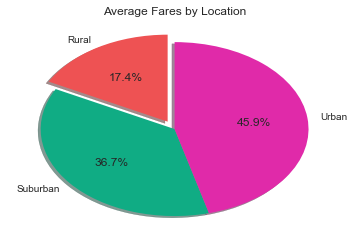

In [130]:
#Total Fare Pie
labels = ["Rural", "Suburban", "Urban"]
sizes = [(rural_sum/total_sum)*100, (suburban_sum/total_sum)*100,(urban_sum/total_sum)*100]
colors = ["#ee5253", "#10ac84", "#e02aa9"]
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=90)
plt.title("Average Fares by Location")

In [124]:
#Total Rides Data
per_df=new_df.groupby('type')
per_df=per_df.count()

per_df=per_df.drop(columns=['driver_count','fare','count'])
per_df=per_df.rename(columns={'city':'counts'})
count_sum=per_df['counts'].sum()

Text(0.5,1,'Total Rides by Location')

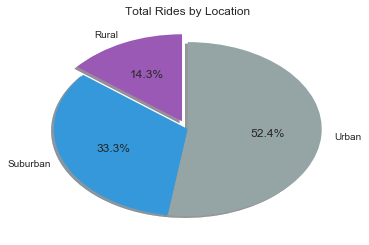

In [129]:
#Total Rides Pie
labels = ["Rural", "Suburban", "Urban"]
sizes = [(18/126)*100, (42/126)*100,(66/126)*100]
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.01f}%'.format, shadow=True, startangle=90)
plt.title("Total Rides by Location")

In [126]:
#Driver Count Data
total_count=new_df['driver_count'].sum()
urban_count=new_df.loc[new_df['type']=='Urban']['driver_count'].sum()
suburban_count=new_df.loc[new_df['type']=='Suburban']['driver_count'].sum()
rural_count=new_df.loc[new_df['type']=='Rural']['driver_count'].sum()

Text(0.5,1,'Driver Percentages by Location')

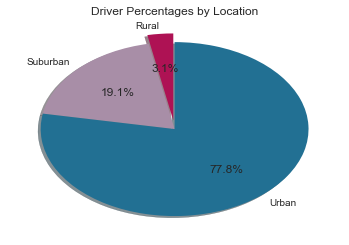

In [128]:
#Driver Count Pie
labels = ["Rural", "Suburban", "Urban"]
sizes = [(rural_count/total_count)*100, (suburban_count/total_count)*100,(urban_count/total_count)*100]
colors = ["#ae1254","#a88ea7","#227093"]
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=90)

plt.title("Driver Percentages by Location")